## Sentiment Analysis
- It is a Text(Sentiment) Classification task 
- the goal is to classify the sentiment of each sentence/review/documents as either **positive, negative or neutral.**
- example: rating b/w 1-5 (1,2: Negative, 3: Neutral, 4,5: Positive)
- This is also called **Opinion Mining.**
- product reviews, PDF analysis, Speech Analysis etc 


## Speech analysis Project
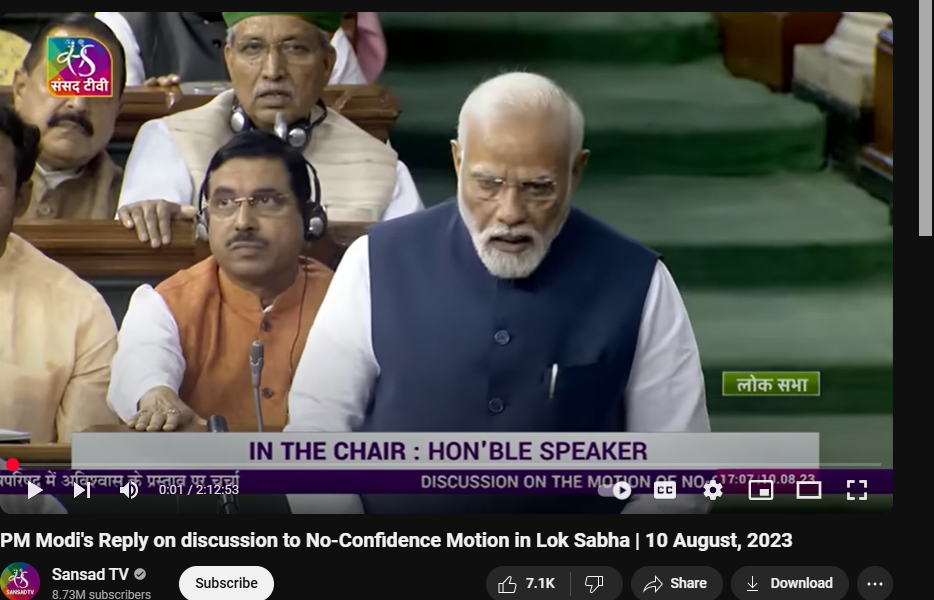

In [1]:
# Importing the basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

import re    # regular expression
import nltk   # natural language toolkit library
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud    # for visualization

nltk.download('punkt')   # needed for tokenization for abbreviatiated words
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
file_path = 'speech.txt'
with open(file_path, 'r', encoding = 'utf-8') as file:
    speech_text = file.read()

In [3]:
file_path

'speech.txt'

In [4]:
speech_text

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [5]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [6]:
print(len(words))
print(len(word_filtered))

3054
1602


In [7]:
# Lemmiitization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [8]:
'''
this is why we don't use stemming much.

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words_stemmed = [stemmer.stem(word) for word in word_filtered]
words_stemmed
'''

"\nthis is why we don't use stemming much.\n\nfrom nltk.stem import PorterStemmer\nstemmer = PorterStemmer()\nwords_stemmed = [stemmer.stem(word) for word in word_filtered]\nwords_stemmed\n"

In [9]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
average_sentiment

0.014298377028714108

In [10]:
len(sentiment_scores)

1602

In [11]:
sum(sentiment_scores)

22.906000000000002

In [12]:
print('The average sentiment is Neutral : ', average_sentiment)

The average sentiment is Neutral :  0.014298377028714108


In [13]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and
                sentiment_scores[i] <= 0.1]

In [14]:
print('The positive words are: \n', positive_words)
print()
print('No. of positive words: ',len(positive_words))

The positive words are: 
 ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'a

In [15]:
print('The negative words are: \n', negative_words)
print()
print('No. of negative words: ',len(negative_words))

The negative words are: 
 ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']

No. of negative words:  82


In [16]:
print('The neutral words are: \n', neutral_words)
print()
print('No. of neutral words: ',len(neutral_words))

The neutral words are: 
 ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first',

In [17]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 74 samples and 138 outcomes>
<FreqDist with 61 samples and 82 outcomes>
<FreqDist with 658 samples and 1382 outcomes>


## Visualization

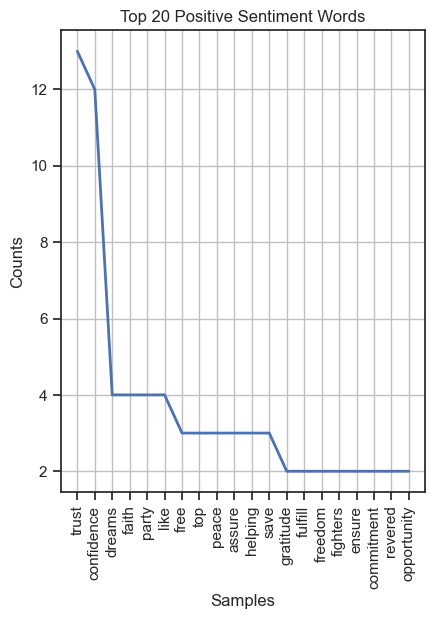

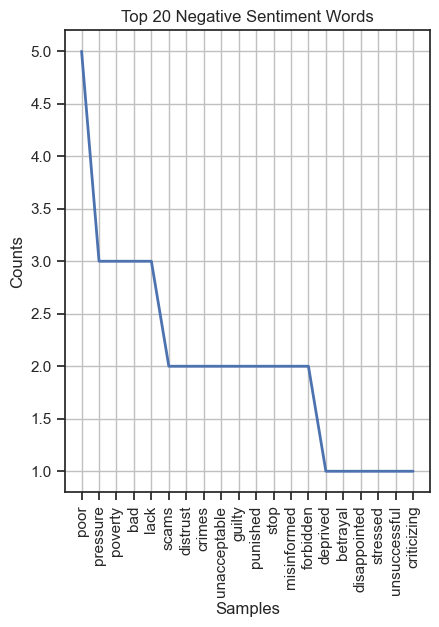

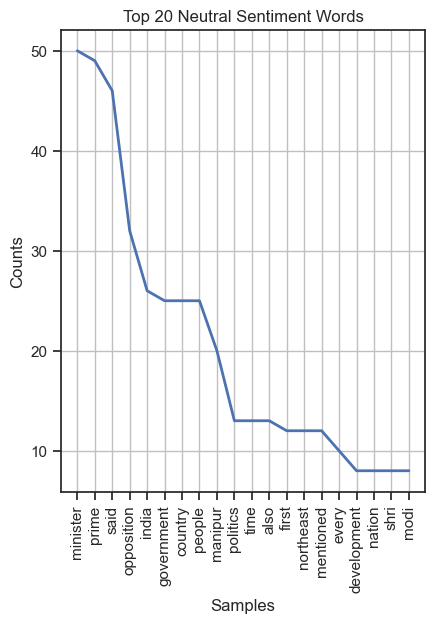

<Figure size 640x480 with 0 Axes>

In [18]:
sns.set_theme(style = 'ticks')

plt.figure(figsize = (16,6))
plt.subplot(131)
word_freq_positive.plot(20, title = 'Top 20 Positive Sentiment Words')

plt.figure(figsize = (16,6))
plt.subplot(132)
word_freq_negative.plot(20, title = 'Top 20 Negative Sentiment Words')

plt.figure(figsize = (16,6))
plt.subplot(133)
word_freq_neutral.plot(20, title = 'Top 20 Neutral Sentiment Words')

plt.tight_layout()
plt.show()

In [19]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), 
                           columns = ['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), 
                           columns = ['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), 
                           columns = ['Word', 'Frequency'])

In [20]:
df_positive

Word  Frequency
0         trust         13
1    confidence         12
2        dreams          4
3         faith          4
4         party          4
5          like          4
6          free          3
7           top          3
8         peace          3
9        assure          3
10      helping          3
11         save          3
12    gratitude          2
13      fulfill          2
14      freedom          2
15     fighters          2
16       ensure          2
17   commitment          2
18      revered          2
19  opportunity          2

In [21]:
df_negative

Word  Frequency
0           poor          5
1       pressure          3
2        poverty          3
3            bad          3
4           lack          3
5          scams          2
6       distrust          2
7         crimes          2
8   unacceptable          2
9         guilty          2
10      punished          2
11          stop          2
12   misinformed          2
13     forbidden          2
14      deprived          1
15      betrayal          1
16  disappointed          1
17      stressed          1
18  unsuccessful          1
19   criticizing          1

In [22]:
df_neutral

Word  Frequency
0      minister         50
1         prime         49
2          said         46
3    opposition         32
4         india         26
5    government         25
6       country         25
7        people         25
8       manipur         20
9      politics         13
10         time         13
11         also         13
12        first         12
13    northeast         12
14    mentioned         12
15        every         10
16  development          8
17       nation          8
18         shri          8
19         modi          8

In [23]:
fig_positive = px.bar(df_positive, x = 'Word', y = 'Frequency', 
                      title = 'Top 20 Positive Sentiment Words')
fig_negative = px.bar(df_negative, x = 'Word', y = 'Frequency', 
                      title = 'Top 20 Negative Sentiment Words')
fig_neutral = px.bar(df_neutral, x = 'Word', y = 'Frequency', 
                      title = 'Top 20 Neutral Sentiment Words')
fig_positive.show()
fig_negative.show()
fig_neutral.show()

In [24]:
wordcloud_positive = WordCloud(width = 800, height = 400, background_color =
                        'white').generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width = 800, height = 400, background_color =
                        'grey').generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width = 800, height = 400, background_color =
                        'black').generate_from_frequencies(word_freq_neutral)

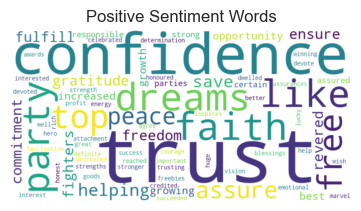

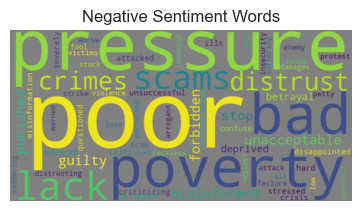

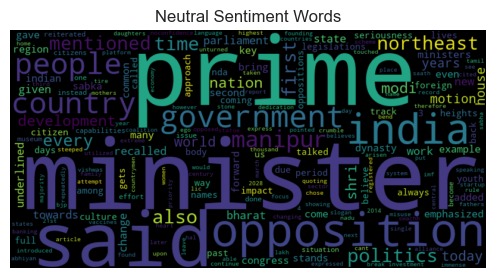

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words')

plt.figure(figsize = (15,5))
plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words')

plt.figure(figsize = (15,5))
plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Words')

plt.tight_layout()
plt.show()

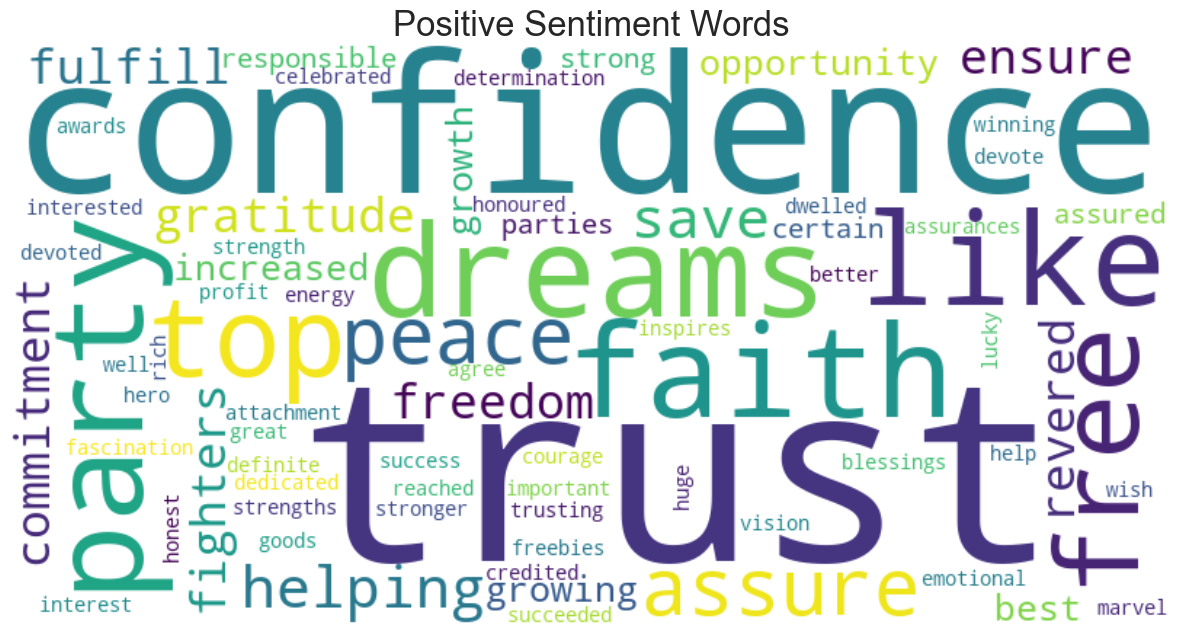

In [26]:
plt.figure(figsize = (15,8))
plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words', fontsize = 25)
plt.show()

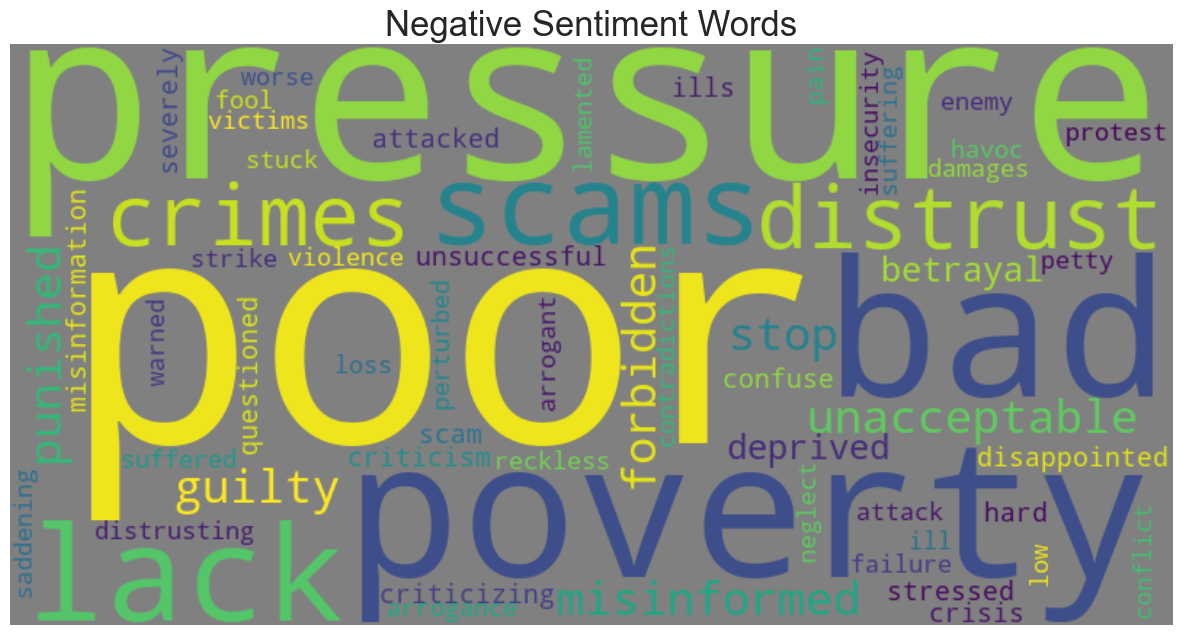

In [27]:
plt.figure(figsize = (15,8))
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words', fontsize  =25)
plt.show()

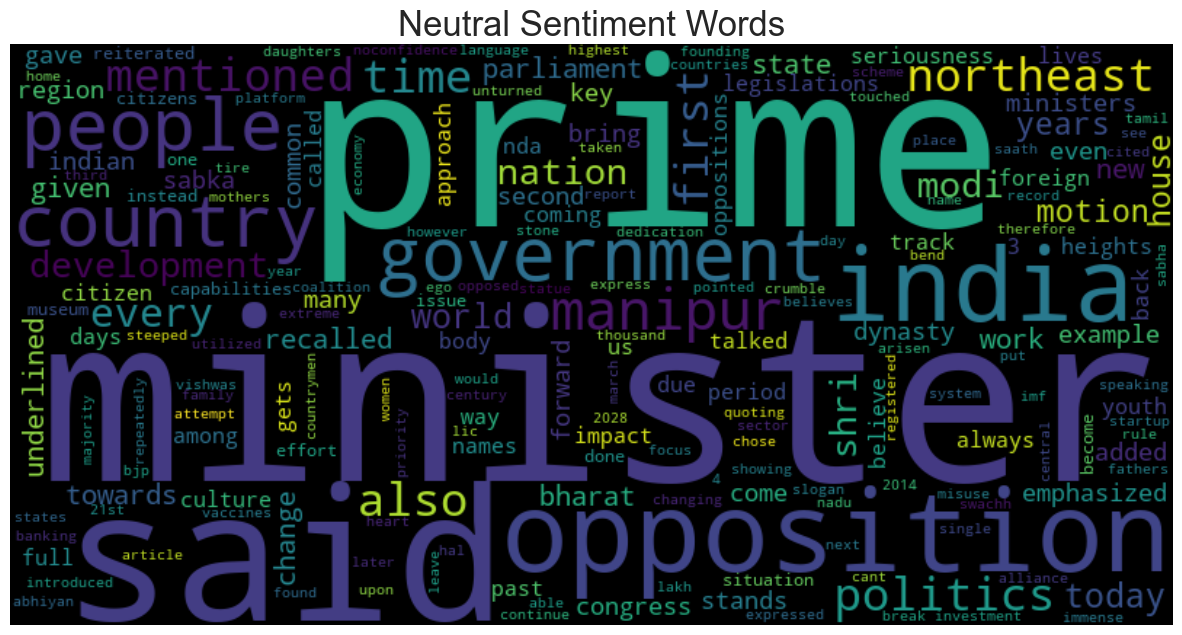

In [28]:
plt.figure(figsize = (15,8))
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Words', fontsize = 25)
plt.show()

In [30]:
#you can do: game of thrones, friends text data - sentiment analysis

### NEXT: sentiment analysis data -> classification problem -> Naive Bayes Theorem & RandomForest Algorithm


In [31]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer, porter

nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [33]:
abc = 'This is a good movie ever seen'
sia.polarity_scores(abc)

{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

In [34]:
abc = 'This was the worst film to every disgrace the screen.'
sia.polarity_scores(abc)

{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8074}

In [35]:
df = pd.read_csv('AmazonProductReviewsData.tsv', sep = '\t')
df

label                                             review
0      pos  Stuning even for the non-gamer: This sound tra...
1      pos  The best soundtrack ever to anything.: I'm rea...
2      pos  Amazing!: This soundtrack is my favorite music...
3      pos  Excellent Soundtrack: I truly like this soundt...
4      pos  Remember, Pull Your Jaw Off The Floor After He...
...    ...                                                ...
9995   pos  A revelation of life in small town America in ...
9996   pos  Great biography of a very interesting journali...
9997   neg  Interesting Subject; Poor Presentation: You'd ...
9998   neg  Don't buy: The box looked used and it is obvio...
9999   pos  Beautiful Pen and Fast Delivery.: The pen was ...

[10000 rows x 2 columns]

In [36]:
df['label'].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [37]:
sia.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [38]:
df.loc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [39]:
df.shape

(10000, 2)

In [40]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [41]:
df['scores'] = df['review'].apply(lambda review : sia.polarity_scores(review))
df.head(10)

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   
5   pos  an absolute masterpiece: I am quite sure any o...   
6   neg  Buyer beware: This is a self-published book, a...   
7   pos  Glorious story: I loved Whisper of the wicked ...   
8   pos  A FIVE STAR BOOK: I just finished reading Whis...   
9   pos  Whispers of the Wicked Saints: This was a easy...   

                                              scores  
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...  
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...  
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...  
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...  
5  {'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...  
6  {'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...  
7  {'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...  
8  {'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...  
9  {'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...

In [42]:
len(df['scores'])

10000

In [43]:
df['compound_score'] = df['scores'].apply(lambda score_dict : score_dict['compound'])
df.head(10)

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   
5   pos  an absolute masterpiece: I am quite sure any o...   
6   neg  Buyer beware: This is a self-published book, a...   
7   pos  Glorious story: I loved Whisper of the wicked ...   
8   pos  A FIVE STAR BOOK: I just finished reading Whis...   
9   pos  Whispers of the Wicked Saints: This was a easy...   

                                              scores  compound_score  
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...          0.9454  
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...          0.8957  
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...          0.9858  
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...          0.9814  
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...          0.9781  
5  {'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...          0.9900  
6  {'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...         -0.8744  
7  {'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...          0.9900  
8  {'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...          0.8353  
9  {'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...          0.8196

In [44]:
df['pred_polarity'] = df['compound_score'].apply(lambda c: 'pos' if c >= 0 else 'neg')
df.head(10)

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   
5   pos  an absolute masterpiece: I am quite sure any o...   
6   neg  Buyer beware: This is a self-published book, a...   
7   pos  Glorious story: I loved Whisper of the wicked ...   
8   pos  A FIVE STAR BOOK: I just finished reading Whis...   
9   pos  Whispers of the Wicked Saints: This was a easy...   

                                              scores  compound_score  \
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...          0.9454   
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...          0.8957   
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...          0.9858   
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...          0.9814   
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...          0.9781   
5  {'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...          0.9900   
6  {'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...         -0.8744   
7  {'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...          0.9900   
8  {'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...          0.8353   
9  {'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...          0.8196   

  pred_polarity  
0           pos  
1           pos  
2           pos  
3           pos  
4           pos  
5           pos  
6           neg  
7           pos  
8           pos  
9           pos

In [45]:
df['pred_polarity'].value_counts()

pred_polarity
pos    6936
neg    3064
Name: count, dtype: int64

## Evaluation Matrix

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
print(confusion_matrix(df['label'], df['pred_polarity']))
print('**********'*7)
print(classification_report(df['label'], df['pred_polarity']))
print('**********'*7)
print(accuracy_score(df['label'], df['pred_polarity']))
print('**********'*7)


[[2629 2468]
 [ 435 4468]]
**********************************************************************
              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000

**********************************************************************
0.7097
**********************************************************************


## To increase accuracy, we will do data pre-processing and use a few other methods as well:
- regular expression
- sentence/word tokenization
- convert into lowercase
- split the data
- lemmatization
- stopwords
- TF-IDF to convert bag of words into numbers
- build a model

In [48]:
df.head()

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   

                                              scores  compound_score  \
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...          0.9454   
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...          0.8957   
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...          0.9858   
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...          0.9814   
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...          0.9781   

  pred_polarity  
0           pos  
1           pos  
2           pos  
3           pos  
4           pos

## Building Machine Learning Approach

In [49]:
ds = pd.read_csv('AmazonProductReviewsData.tsv', sep = '\t') 
ds

label                                             review
0      pos  Stuning even for the non-gamer: This sound tra...
1      pos  The best soundtrack ever to anything.: I'm rea...
2      pos  Amazing!: This soundtrack is my favorite music...
3      pos  Excellent Soundtrack: I truly like this soundt...
4      pos  Remember, Pull Your Jaw Off The Floor After He...
...    ...                                                ...
9995   pos  A revelation of life in small town America in ...
9996   pos  Great biography of a very interesting journali...
9997   neg  Interesting Subject; Poor Presentation: You'd ...
9998   neg  Don't buy: The box looked used and it is obvio...
9999   pos  Beautiful Pen and Fast Delivery.: The pen was ...

[10000 rows x 2 columns]

## Pre-processed Method

In [50]:
from tqdm import tqdm   
# it is some sort of scale which tells if 100% conversion is done or not

In [51]:
preprocessed_reviews = []

for sentence in tqdm(df['review'].values):
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = ' '.join(word.lower() for word in sentence.split() if word.lower() not in stopwords.words('english'))
    preprocessed_reviews.append(sentence.strip())

100%|██████████| 10000/10000 [03:54<00:00, 42.66it/s]


In [52]:
preprocessed_reviews

['stuning even non gamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen',
 'best soundtrack ever anything reading lot reviews saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening years beauty simply refuses fade price tag pretty staggering must say going buy cd much money one feel would worth every penny',
 'amazing soundtrack favorite music time hands intense sadness prisoners fate means played game hope distant promise girl stole star important inspiration personally throughout teen years higher energy tracks like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb well soundtrack amazing music probably best composer work heard xenogear

## Feature Extraction

## TF-IDF method (Term Frequency - Inverse Documents Frequency) 
### Term Frequency means probability value
### Inverse Documents Frequency means the significance of a particular word on a particular document (review in this case)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(x).shape

(10000, 30543)

In [55]:
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes
df['label'].value_counts()

label
0    5097
1    4903
Name: count, dtype: int64

### Split the data into train and test

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df['label'], 
                                        test_size = 0.25, random_state = 11)

## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,  y_train)

RandomForestClassifier()

In [58]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [59]:
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train))
print('*****'*8)
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test))

Training Accuracy:  1.0
****************************************
Testing Accuracy:  0.8356


### Since we can see 16% variance in training and testing accuracies, therefore we can say that there is overfitting happening, therefore we will use cross-validation.

In [60]:
from sklearn.model_selection import cross_val_score

In [ ]:
training_accuracy = cross_val_score(rf, x_train, y_train, cv = 5)
training_accuracy.mean()